In [ ]:
"""
##################################################
## Author: Raghav Dhanuka - s4593673
## Copyright: Copyright 2020, Improved U-Net - ISICs Dataset
## Credits: [Raghav Dhanuka, Shakes and Team]
## Date: Nov 3 12:17:14 2020
## License: COMP3701
## Version: “0.1.0”
## Mmaintainer: Raghav Dhanuka
## Email: r.dhanuka@uqconnect.edu.au
## Status: 'Dev'
## Description: This is the Output File for the model with overall Dice Score 0.85
##################################################
"""

Using TensorFlow backend.


Please Enter the Path for Training_Input_x2D:/ISIC2018_Task1-2_Training_Input_x2
Please Enter the Path for Training_GroundTruth_x2D:/ISIC2018_Task1_Training_GroundTruth_x2
No. of images in training folder=  2594
No. of images in test folder=  2594


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 256, 256, 16) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

Train on 1556 samples, validate on 519 samples
Epoch 1/50
1556/1556 [==============================] - 23s 14ms/step - loss: 0.5020 - accuracy: 0.7780 - dice_coeff: 0.5410 - val_loss: 0.3589 - val_accuracy: 0.8260 - val_dice_coeff: 0.6362

Epoch 00001: val_loss improved from inf to 0.35885, saving model to model-ISIC.h5
Epoch 2/50
1556/1556 [==============================] - 16s 10ms/step - loss: 0.3235 - accuracy: 0.8821 - dice_coeff: 0.6931 - val_loss: 0.2862 - val_accuracy: 0.8906 - val_dice_coeff: 0.7404

Epoch 00002: val_loss improved from 0.35885 to 0.28620, saving model to model-ISIC.h5
Epoch 3/50
1556/1556 [==============================] - 16s 11ms/step - loss: 0.2632 - accuracy: 0.9059 - dice_coeff: 0.7496 - val_loss: 0.2614 - val_accuracy: 0.9060 - val_dice_coeff: 0.7048

Epoch 00003: val_loss improved from 0.28620 to 0.26143, saving model to model-ISIC.h5
Epoch 4/50
1556/1556 [==============================] - 16s 11ms/step - loss: 0.2402 - accuracy: 0.9135 - dice_coeff: 0.

1556/1556 [==============================] - 16s 10ms/step - loss: 0.1230 - accuracy: 0.9507 - dice_coeff: 0.8715 - val_loss: 0.1619 - val_accuracy: 0.9398 - val_dice_coeff: 0.8689

Epoch 00032: val_loss did not improve from 0.14098
Epoch 33/50
1556/1556 [==============================] - 16s 10ms/step - loss: 0.1204 - accuracy: 0.9521 - dice_coeff: 0.8743 - val_loss: 0.1476 - val_accuracy: 0.9450 - val_dice_coeff: 0.8694

Epoch 00033: val_loss did not improve from 0.14098
Epoch 34/50
1556/1556 [==============================] - 16s 10ms/step - loss: 0.1211 - accuracy: 0.9517 - dice_coeff: 0.8736 - val_loss: 0.1591 - val_accuracy: 0.9401 - val_dice_coeff: 0.8595

Epoch 00034: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.

Epoch 00034: val_loss did not improve from 0.14098
Epoch 35/50
1556/1556 [==============================] - 16s 10ms/step - loss: 0.1028 - accuracy: 0.9581 - dice_coeff: 0.8880 - val_loss: 0.1505 - val_accuracy: 0.9455 - val_dice_coeff: 0.8786

E

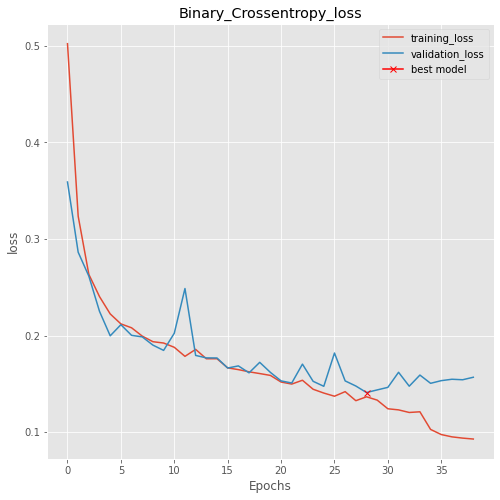

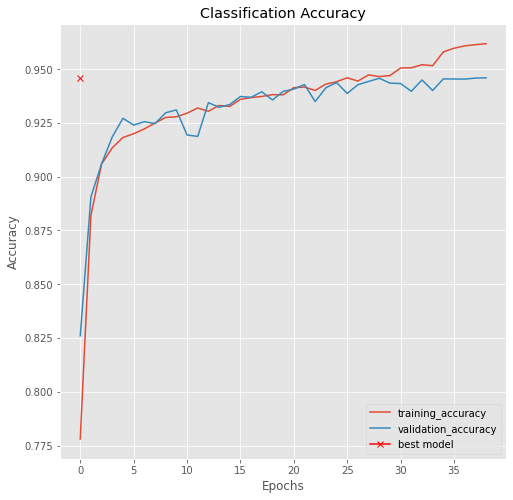

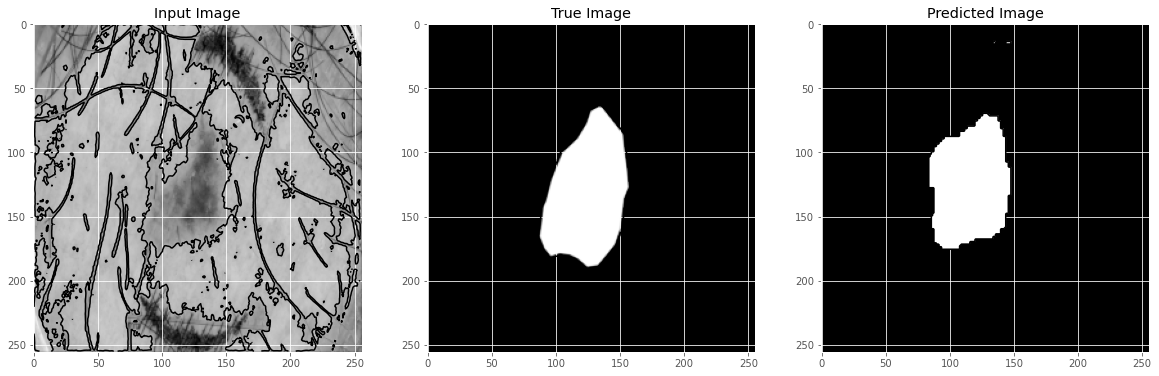

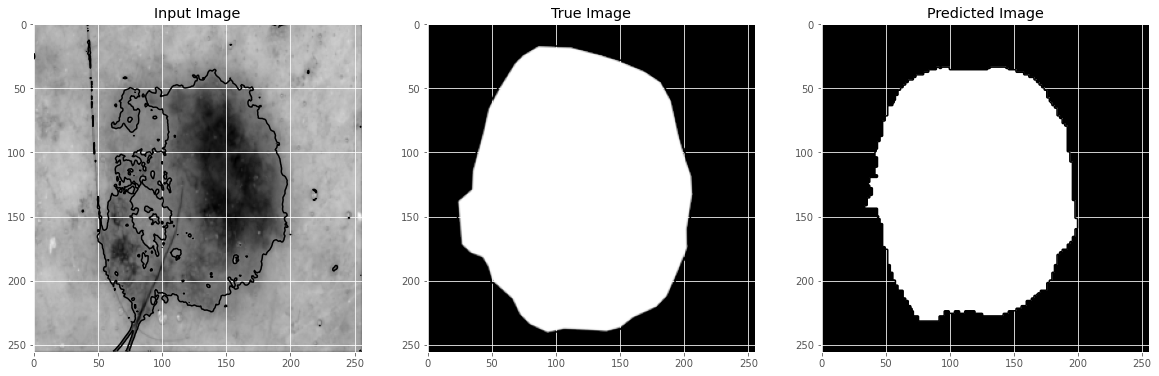

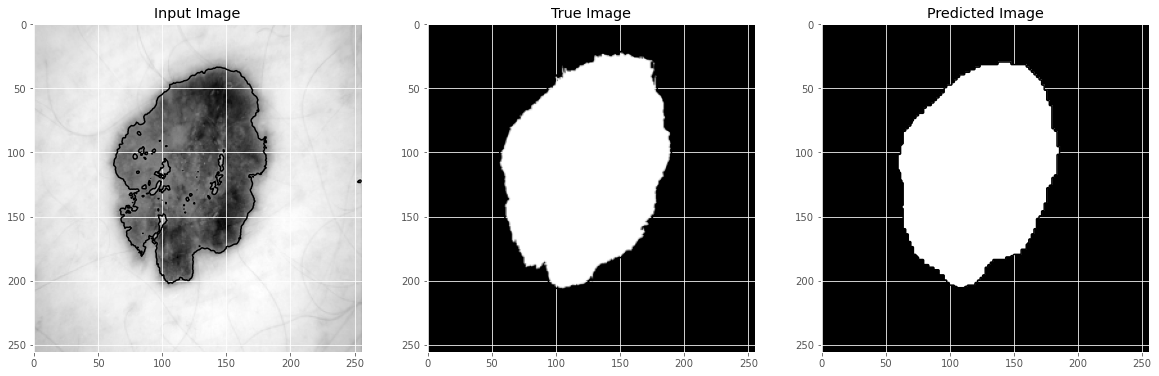

In [1]:
# Libraries used for this Project
import os # used for interaction with the operating system 
import random # used for picking up random varaibales
import pandas as pd # used for structuring the data in dataframe
import numpy as np # used for preprocessing the data in an matrix or array format
import matplotlib.pyplot as plt # used for ploting the images and graphs
plt.style.use("ggplot") # used to plot in ggplot style
%matplotlib inline
from tqdm import tqdm_notebook, tnrange # used for printing the status bar
from itertools import chain # used for iteration 
from skimage.io import imread, imshow, concatenate_images # Scikit learn package for reading, showing and concatinating image size
from skimage.transform import resize # Scikit learn package for resizing the image dimensions
from skimage.morphology import label
from sklearn.model_selection import train_test_split # Scikit learn package used for test train split
import tensorflow as tf # used for training inference of deep learning architecture
from keras.models import Model, load_model # Keras package used for defining the model
from keras.layers import Input, BatchNormalization,LeakyReLU, concatenate, Add, Activation, Dense, Dropout, Flatten # Keras package used for construsting the input, Batch Norm
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D  # Keras package used for defining the Convolution2D layers
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D # Keras package used for defining the MaxPool
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau # Keras package used for defining the calback for early stop
from keras.optimizers import Adam # Keras package used for defining the model optimizer as ADAM
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical
from tensorflow.keras import Sequential

%run Final_Project.ipynb

# Global Variable
img_width = 256 # Defining the width of image
img_height =256 # Defining the Height of image
border = 5 # Defining the boder size

# Input from the User to prove the Folder Path of the ISICs Data Set
path_train = input("Please Enter the Path for Training_Input_x2")
path_seg = input("Please Enter the Path for Training_GroundTruth_x2")


def main():
    """This Function is calling all the functions defined in the module script named "Final_Project" """
    # Loading dataset for the model
    isic_train, isic_seg_train = path_for_dataset(path_train,path_seg)
    isic_train_sort,isic_seg_train_sort = sorted_test(isic_train, isic_seg_train)
    X_ISIC_train = Load_img(path_train+"/",isic_train_sort)
    Y_ISIC_train = Load_segmentation(path_seg+"/",isic_seg_train_sort)
    X_train, X_test, y_train, y_test, X_val, y_val = load_dataset(X_ISIC_train, Y_ISIC_train)
    # Preprocessing Dataset for Training and Testing
    Y_ISIC_train_cat, Y_ISIC_test_cat, Y_ISIC_val_cat = pre_processing(y_train,y_test,y_val)
    # calls the U-Net architecture for the specifid dataset
    model = generat_unet() 
    model.compile(optimizer=Adam(learning_rate=5e-4), loss="binary_crossentropy", metrics=["accuracy",dice_coeff]) # compiling the model using the dice_loss
    model.summary()
    callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-ISIC.h5', verbose=1, save_best_only=True, save_weights_only=True)]
    results = model.fit(X_train, Y_ISIC_train_cat, batch_size=8, epochs=50, callbacks=callbacks,
                    validation_data=(X_val, Y_ISIC_val_cat))
    # Outputs the overall dice coeff and dice score for 5 test data
    test_preds_reshape = best_model(model,X_test,y_test,Y_ISIC_test_cat)
    # Plotting the Loss and Accuracy of the model
    loss_plot(results)
    acc_plot(results)
    # Output for True and prediced seg.
    plot_ISIc(X_test,y_test,test_preds_reshape)
    plot_ISIc(X_test,y_test,test_preds_reshape)
    plot_ISIc(X_test,y_test,test_preds_reshape)

if __name__ == "__main__":    
    main()    

